In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Extreme value 

In [2]:
def fitEV(data):
    evDist = gumbel_r.fit(data)
    gamma = evDist[0]
    delta = evDist[1]
    print('Gumbel distribution params.')
    print('gamma: {:.4f}'.format(gamma))
    print('delta: {:.4f}'.format(delta))
    print('*ML est.')
    return gamma, delta

In [3]:
def eCDF(data):
    ecdf = (data.index.to_numpy()+1) / (len(data)+1)
    return ecdf

In [29]:
def gumbelPlot(data, gamma=None, delta=None, ax=None):

    if ax==None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    # empirical cdf
    dataSorted = data.sort_values()
    ecdf = eCDF(dataSorted)

    # reduced variable for Gumbel plot
    redVar = -1.0 * np.log(-np.log(ecdf))

    # EV CDF
    if ((gamma==None) or (delta==None)):
        gamma, delta = fitEV(data)

    # x-values from redVar (using EV ML parameter estimation)
    xML = delta*redVar + gamma
    
    ax.plot(dataSorted, redVar, ls='', marker='o')
    ax.plot(xML, redVar)

    ax.set_ylabel('Reduced variable')
    ax.set_xlabel('X (size, length, etc.)')
    ax.grid(ls='--', color='lightgray')

    ax.annotate("Gumbel params.", fontweight='bold',
                xy=(0.15, 0.85), xycoords='subfigure fraction')
    ax.annotate(r"$\gamma =${:.4f}".format(gamma),
                xy=(0.15, 0.80), xycoords='subfigure fraction')
    ax.annotate(r"$\delta =${:.4f}".format(delta),
                xy=(0.15, 0.75), xycoords='subfigure fraction')
    

# Application

In [21]:
specNum = [5, 3, 1, 6, 3, 2, 2, 6,
           1, 2, 4, 2, 6, 4, 4, 4, 
           5, 6, 5, 3, 1, 1, 5, 3]

In [22]:
specTag = ['C', 'A', 'B', 'A', 'B', 'A', 'B', 'D', 
           'A', 'C', 'B', 'D', 'B', 'D', 'A', 'C',
           'A', 'C', 'B', 'C', 'C', 'D', 'D', 'D']

In [23]:
length = [22.18, 29.03, 30.73, 33.98, 35.00, 37.24, 37.43, 37.43,
          40.29, 44.79, 44.82, 46.53, 48.55, 49.15, 52.46, 59.83,
          62.21, 64.32, 66.13, 70.87, 73.48, 78.91, 82.39, 94.28
         ]

In [24]:
df = pd.DataFrame(list(zip(specNum, specTag, length)),
                     columns=['numField', 'tagField', 'incData'])
df.sort_values(by='incData', ascending=True, inplace=True) # necessary

In [25]:
df.head()

,numField,tagField,incData
0,5,C,22.18
1,3,A,29.03
2,1,B,30.73
3,6,A,33.98
4,3,B,35.00


In [26]:
gamma, delta = fitEV(df.incData)

Gumbel distribution params.
gamma: 43.0562
delta: 14.9813
*ML est.


Gumbel distribution params.
gamma: 43.0562
delta: 14.9813
*ML est.


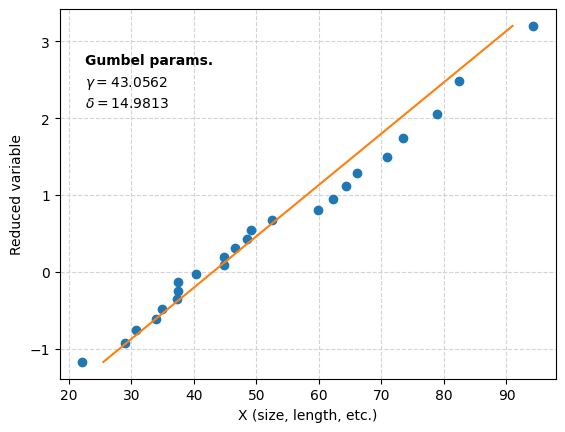

In [30]:
gumbelPlot(df.incData)